In [93]:
import estraces
import numpy as np
# from tqdm import trange
import matplotlib.pyplot as plt
from tqdm import tqdm


In [94]:
# AES SBox
sbox = np.array([
    # 0     1    2    3    4    5    6    7    8    9    A    B    C    D    E    F
    0x63, 0x7c, 0x77, 0x7b, 0xf2, 0x6b, 0x6f, 0xc5, 0x30, 0x01, 0x67, 0x2b, 0xfe, 0xd7, 0xab, 0x76,
    0xca, 0x82, 0xc9, 0x7d, 0xfa, 0x59, 0x47, 0xf0, 0xad, 0xd4, 0xa2, 0xaf, 0x9c, 0xa4, 0x72, 0xc0,
    0xb7, 0xfd, 0x93, 0x26, 0x36, 0x3f, 0xf7, 0xcc, 0x34, 0xa5, 0xe5, 0xf1, 0x71, 0xd8, 0x31, 0x15,
    0x04, 0xc7, 0x23, 0xc3, 0x18, 0x96, 0x05, 0x9a, 0x07, 0x12, 0x80, 0xe2, 0xeb, 0x27, 0xb2, 0x75,
    0x09, 0x83, 0x2c, 0x1a, 0x1b, 0x6e, 0x5a, 0xa0, 0x52, 0x3b, 0xd6, 0xb3, 0x29, 0xe3, 0x2f, 0x84,
    0x53, 0xd1, 0x00, 0xed, 0x20, 0xfc, 0xb1, 0x5b, 0x6a, 0xcb, 0xbe, 0x39, 0x4a, 0x4c, 0x58, 0xcf,
    0xd0, 0xef, 0xaa, 0xfb, 0x43, 0x4d, 0x33, 0x85, 0x45, 0xf9, 0x02, 0x7f, 0x50, 0x3c, 0x9f, 0xa8,
    0x51, 0xa3, 0x40, 0x8f, 0x92, 0x9d, 0x38, 0xf5, 0xbc, 0xb6, 0xda, 0x21, 0x10, 0xff, 0xf3, 0xd2,
    0xcd, 0x0c, 0x13, 0xec, 0x5f, 0x97, 0x44, 0x17, 0xc4, 0xa7, 0x7e, 0x3d, 0x64, 0x5d, 0x19, 0x73,
    0x60, 0x81, 0x4f, 0xdc, 0x22, 0x2a, 0x90, 0x88, 0x46, 0xee, 0xb8, 0x14, 0xde, 0x5e, 0x0b, 0xdb,
    0xe0, 0x32, 0x3a, 0x0a, 0x49, 0x06, 0x24, 0x5c, 0xc2, 0xd3, 0xac, 0x62, 0x91, 0x95, 0xe4, 0x79,
    0xe7, 0xc8, 0x37, 0x6d, 0x8d, 0xd5, 0x4e, 0xa9, 0x6c, 0x56, 0xf4, 0xea, 0x65, 0x7a, 0xae, 0x08,
    0xba, 0x78, 0x25, 0x2e, 0x1c, 0xa6, 0xb4, 0xc6, 0xe8, 0xdd, 0x74, 0x1f, 0x4b, 0xbd, 0x8b, 0x8a,
    0x70, 0x3e, 0xb5, 0x66, 0x48, 0x03, 0xf6, 0x0e, 0x61, 0x35, 0x57, 0xb9, 0x86, 0xc1, 0x1d, 0x9e,
    0xe1, 0xf8, 0x98, 0x11, 0x69, 0xd9, 0x8e, 0x94, 0x9b, 0x1e, 0x87, 0xe9, 0xce, 0x55, 0x28, 0xdf,
    0x8c, 0xa1, 0x89, 0x0d, 0xbf, 0xe6, 0x42, 0x68, 0x41, 0x99, 0x2d, 0x0f, 0xb0, 0x54, 0xbb, 0x16
], dtype=np.uint8)


In [114]:
path_fixed1 = "./traces/traces_set_fixKey1_fixPlain2.ets"
path_random1 = "./traces/traces_set_fixKey1_RndPlain2.ets"

ths_fixed1 = estraces.read_ths_from_ets_file(path_fixed1)
ths_random1 = estraces.read_ths_from_ets_file(path_random1)

In [115]:
nb_traces = 100
ths_0=ths_fixed1[:nb_traces]
ths_1=ths_random1[:nb_traces]
# Extraire les traces et les textes en clair
traces = np.array([t.samples for t in ths_1])
plaintexts = np.array([t.plaintext for t in ths_1])
true_key = ths_1[0].key

In [116]:
ths_0[0]

Trace:
Reader instance..: ETS format reader of file ./traces/traces_set_fixKey1_fixPlain2.ets with 100 traces.
Index in set.....: 0
Samples size.....: 5000
ciphertext.......: [ 88 215 123 159   2 112 208 144  86 188  57 151 188 231 207 248]
key..............: [ 43 126  21  22  40 174 210 166 171 247  21 136   9 207  79  60]
plaintext........: [216 159 165  95 105  26  45  82  24 104  19 141 208 104  97 223]

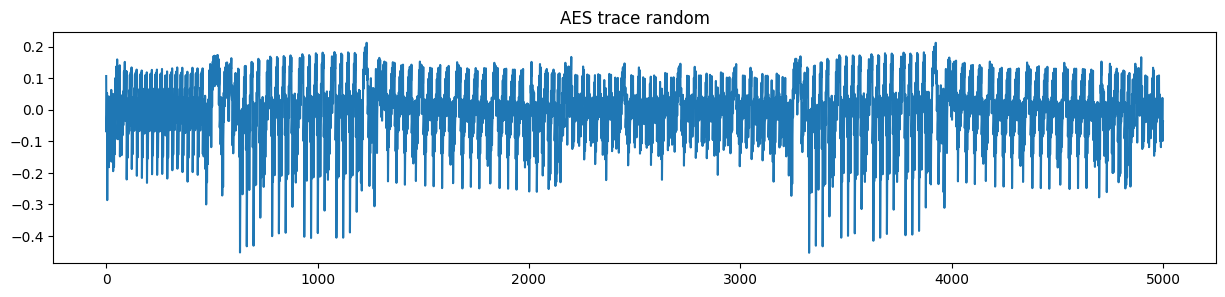

In [97]:
plt.rcParams['figure.figsize']=(15,3)

plt.plot(ths_1.samples[0:1].T)
plt.title('AES trace random')
plt.show()

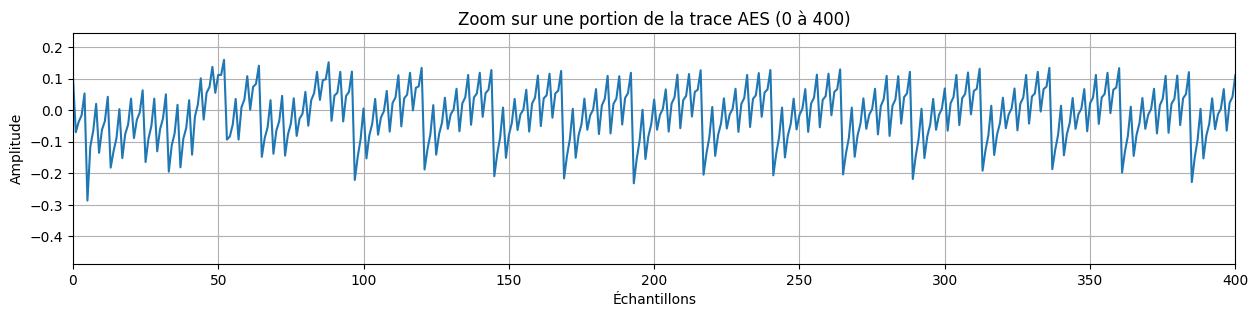

In [111]:
plt.figure(figsize=(15, 3))
plt.plot(traces[0])  
plt.title("Zoom sur une portion de la trace AES (0 à 400)")
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.grid(True)

plt.xlim(0, 400)

plt.show()


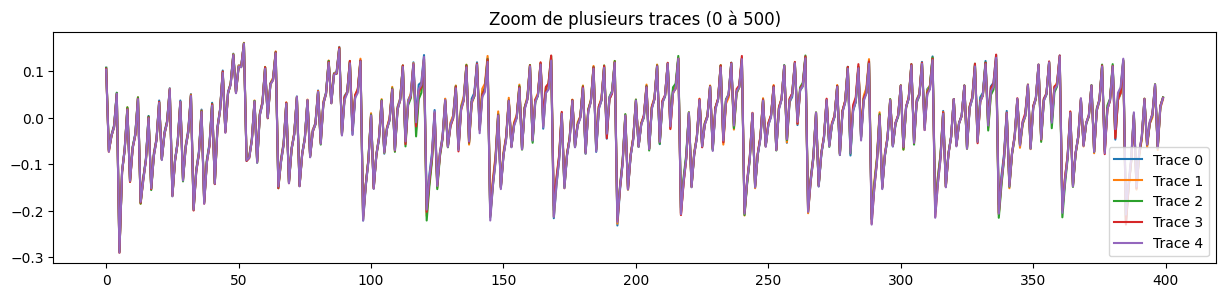

In [98]:
for i in range(5):
    plt.plot(traces[i, 0:400], label=f'Trace {i}')
plt.title("Zoom de plusieurs traces (0 à 500)")
plt.legend()
plt.show()


$$r = \frac{cov(X, Y)}{\sigma_X \sigma_Y}$$

$cov(X, Y)$ is the covariance of `X` and `Y` and can be calculated as follows:

$$cov(X, Y) = \sum_{n=1}^{N}[(Y_n - \bar{Y})(X_n - \bar{X})]$$

$\sigma_X$ and $\sigma_Y$ are the standard deviation of the two datasets. This value can be calculated with the following equation:

$$\sigma_X = \sqrt{\sum_{n=1}^{N}(X_n - \bar{X})^2}$$

In [99]:
def hamming_weight(x):
    return bin(x).count('1')

In [100]:
def cpa_attack(traces, plaintexts, byte_index, SBOX):
    correlations = []

    for key_guess in range(256):
        hypothetical_leakage = np.array([
            hamming_weight(SBOX[pt[byte_index] ^ key_guess]) for pt in plaintexts
        ])
        
        leakage_mean = np.mean(hypothetical_leakage)
        centered_leakage = hypothetical_leakage - leakage_mean
        centered_traces = traces - np.mean(traces, axis=0)

        covariances = np.dot(centered_leakage, centered_traces)
        std_leak = np.sqrt(np.sum(centered_leakage ** 2))
        std_trace = np.sqrt(np.sum(centered_traces ** 2, axis=0))
        correlation = covariances / (std_leak * std_trace)

        correlations.append(np.max(np.abs(correlation)))

    return correlations


In [102]:
def plot_correlation_curve(ax, correlations, byte_index, true_key_byte):
    ax.plot(correlations)
    ax.set_title(f"Octet {byte_index} — Clé réelle: {true_key_byte}")
    ax.set_xlabel("Hypothèse de clé")
    ax.set_ylabel("Corrélation")
    ax.grid(True)

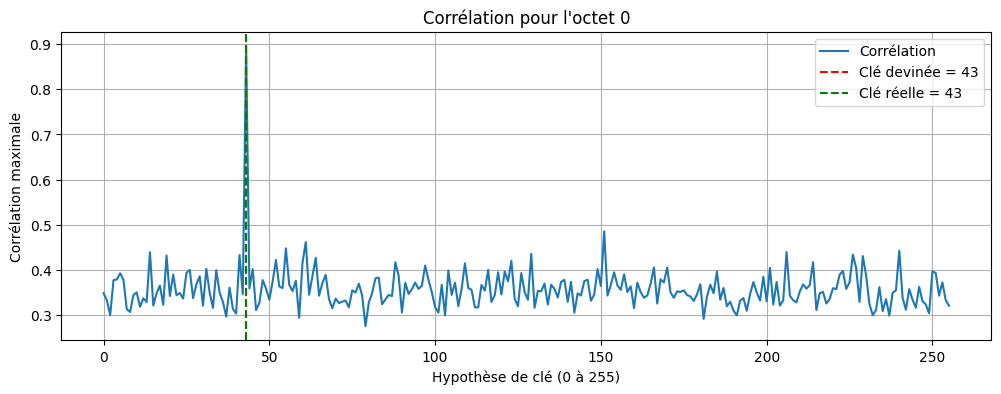

In [108]:
byte_index = 0

correlations = cpa_attack(traces, plaintexts, byte_index, sbox)

guessed = np.argmax(correlations)

# Affichage
plt.figure(figsize=(12, 4))
plt.plot(correlations, label="Corrélation")
plt.axvline(x=guessed, color='r', linestyle='--', label=f"Clé devinée = {guessed}")
plt.axvline(x=true_key[byte_index], color='g', linestyle='--', label=f"Clé réelle = {true_key[byte_index]}")
plt.title(f"Corrélation pour l'octet {byte_index}")
plt.xlabel("Hypothèse de clé (0 à 255)")
plt.ylabel("Corrélation maximale")
plt.legend()
plt.grid(True)
plt.show()

100%|██████████| 16/16 [00:10<00:00,  1.60it/s]


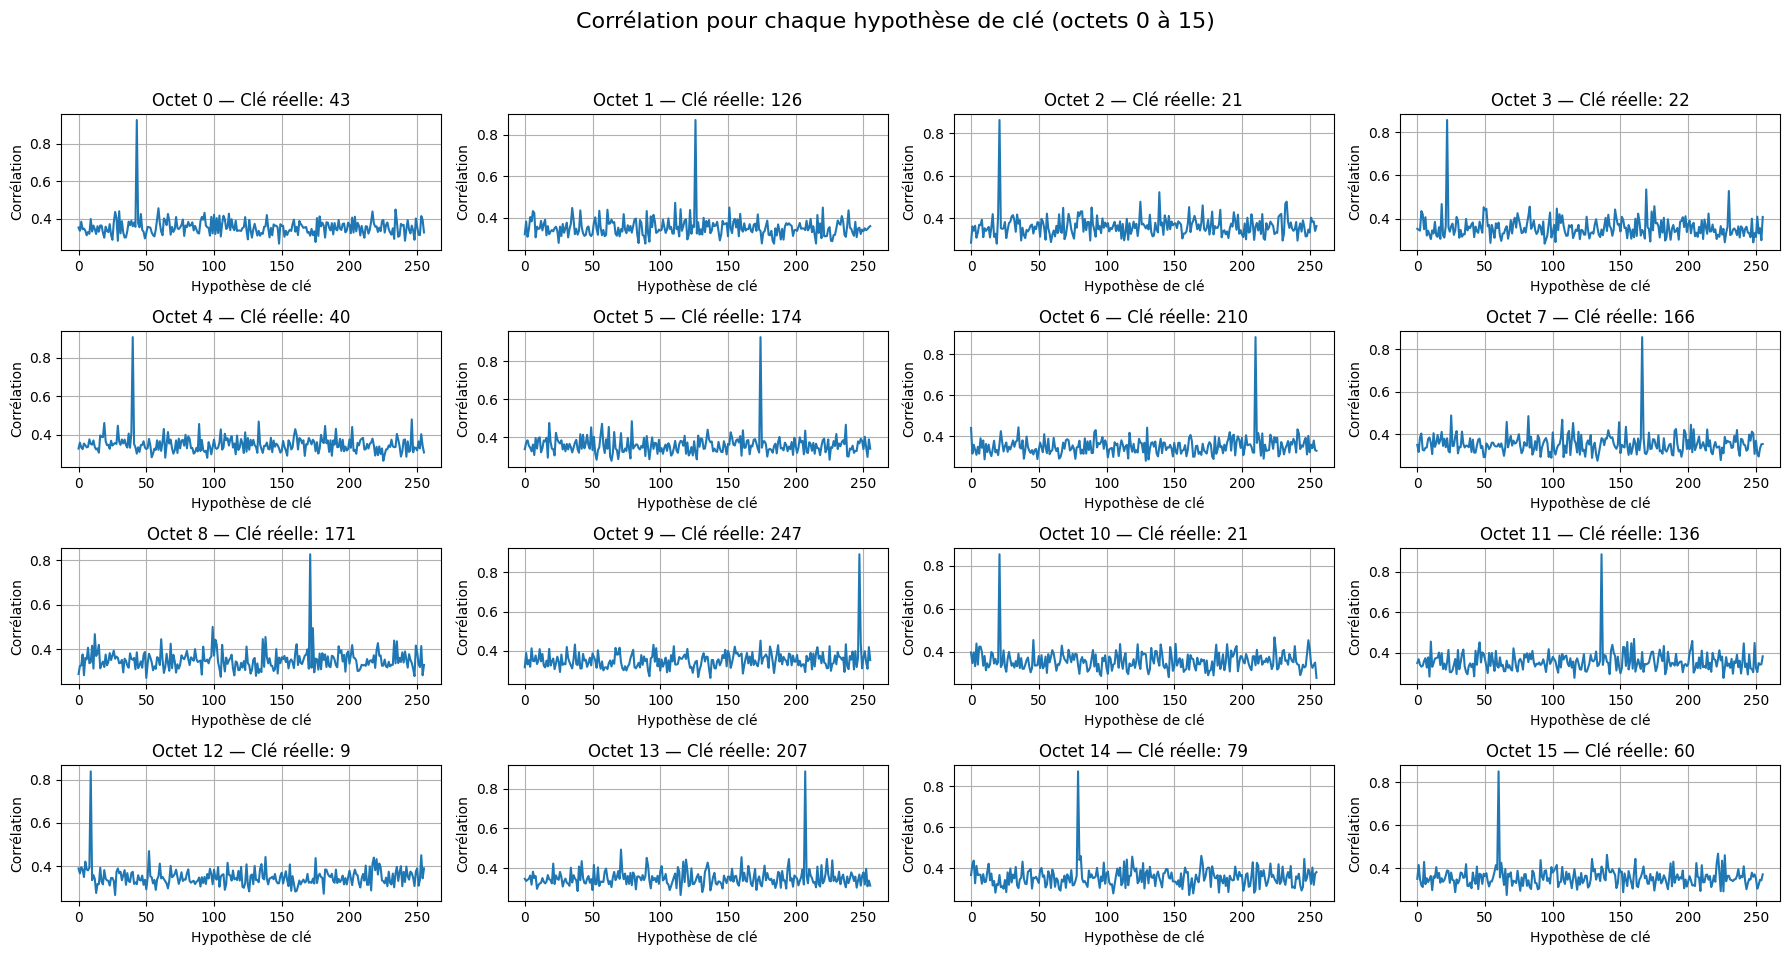

Clé estimée : [43, 126, 21, 22, 40, 174, 210, 166, 171, 247, 21, 136, 9, 207, 79, 60]
Clé réelle  : [43, 126, 21, 22, 40, 174, 210, 166, 171, 247, 21, 136, 9, 207, 79, 60]


In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(18, 10))
fig.suptitle("Corrélation pour chaque hypothèse de clé (octets 0 à 15)", fontsize=16)

guessed_key = []

for byte_index in tqdm(range(16)):
    correlations = cpa_attack(traces, plaintexts, byte_index, sbox)
    
    guessed = np.argmax(correlations)
    guessed_key.append(guessed)
    
    ax = axs[byte_index // 4][byte_index % 4]
    plot_correlation_curve(ax, correlations, byte_index, true_key[byte_index])

